# Model testing
  Creating an AI Model that predicts a disease using patient symptoms
* TO DO:
  1. Import libraries we will use
  2. Import our cleaned medical dataset
  3. Encode the disease column
  4. Get data ready(split to training and testing)
  5. Select  models and compare them
  6. We will try to improve our model(Hyperparameter tuning)
  7. Evaluating our tuned machine learning classifier
  8. Export the model
  9. import, load, and test the model again
  

## 1) Import libraries 


In [1]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Models from Scikit-Learn
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.preprocessing import label_binarize

# Hide all warnings
import warnings
warnings.filterwarnings('ignore')



## 2) Import the dataset

In [2]:
#import dataset
dataset = pd.read_csv("clean_dataset.csv")

#view first 5 rows
dataset.head()

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,glaucoma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,glaucoma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,glaucoma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,glaucoma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,glaucoma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3) Encode the disease column
  * Since machines understand numbers, we need to change our disease column to numbers.
  * We know three ways of changing words to numbers.            
     - using dummies     
     - One-hot encode     
     - label encode
  * We will use label encoding, it's easy and fast, we can also decode back to the disease name easily and fast

In [3]:
# Use the labelEncode()  to encode the diseases column
le = LabelEncoder()
dataset["disease_encoded"] = le.fit_transform(dataset["diseases"])

#view first 5 rows to see the new encoded column 
dataset.head()

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness,disease_encoded
0,glaucoma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
1,glaucoma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
2,glaucoma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
3,glaucoma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
4,glaucoma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19


## 4) Get data ready
   * We will separate our dataset into X and y
   * X for `Feature Columns` - Multiple symptom columns
   * y for `Target Column (diseases)` – the label representing the medical condition
   * After that, we will split the data into train and test. training taking 80% and test 20%

In [4]:
# Separate dataset into X and y
X = dataset.drop({"diseases","disease_encoded"} ,axis=1)
y = dataset["disease_encoded"]

#Split the data into train and test
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

## 5) Select models and compare them
* We will compare some of the classification models.
* We will create a function called `fit_and_score `, which will fit the model and return the accuracy of each model 
* The model that returns the highest accuracy will be the one that we will use as our model
* We will also visualize the accuracy using bar graphs

In [5]:
#Set random seed
np.random.seed(42)

# Creating a dictionary
models = {"Decision Tree" :DecisionTreeClassifier(),
          "Naïve Bayes" : GaussianNB(),
          "Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier(),
          "LinearSVC": LinearSVC(),
          "KNeighbors": KNeighborsClassifier()}      

In [6]:
# Create a function that will fit and score  all the models in the dictionary variable
def fit_and_score(models, X_train ,X_test, y_train, y_test):

    #Set random seed
    np.random.seed(42)
    
    #Make a dictionary to keep model scores
    model_scores = {}

    #loop through model
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train,y_train)

        #Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test,y_test)
        
    return model_scores

In [7]:
# call function and set correct  arguments
fit_and_score(models,X_train,X_test,y_train,y_test)

{'Decision Tree': 0.9444095477386935,
 'Naïve Bayes': 0.9714195979899497,
 'Logistic Regression': 0.9641959798994975,
 'Random Forest': 0.9588567839195979,
 'LinearSVC': 0.9660804020100503,
 'KNeighbors': 0.9591708542713567}

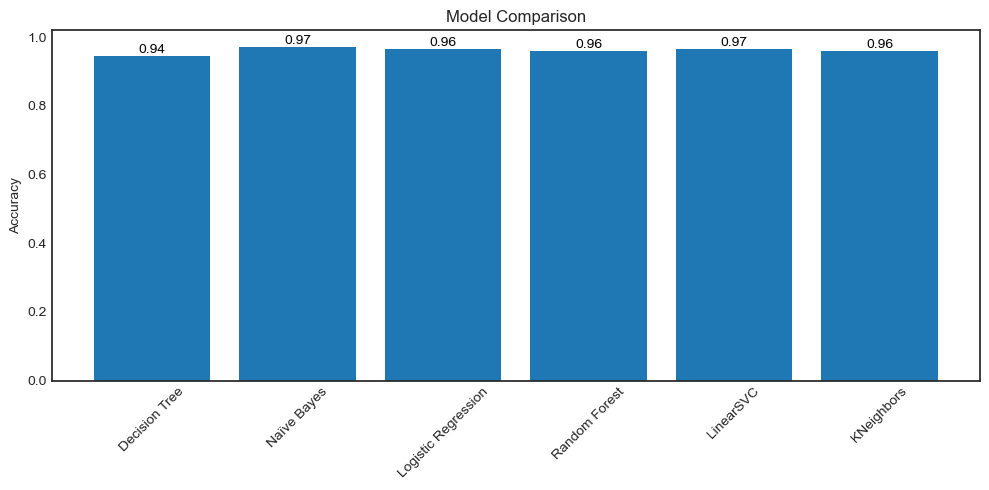

In [8]:
# visualize the accuracy using bar graphs
plt.style.use("seaborn-v0_8-white")
# create a variable and initialize the model scores
model_score = fit_and_score(models,X_train,X_test,y_train,y_test)

# create a dataset for model scores
model_compare = pd.DataFrame(model_score,index=["accuracy"])

# Plot the bar graph
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(model_compare.columns, model_compare.loc["accuracy"])

# Add labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.2f}",
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Add axis labels and title
ax.set_ylabel("Accuracy")
ax.set_title("Model Comparison")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

# 6) Hyperparameter tuning
* It seems all models are doing well, and the need to improve the machine is not necessary, but if we improve it, maybe we will get a perfect model accuracy of 1.0
* We know three ways to improve a model
   - by hand
   - RandomSearchCV
   - GridSearchCV
 * Out of 6 models, we  have compared,2 models  got the same highest  accuracy, which  are `Naive Bayes` and `LinearSVC`.
 * We will  try to improve only 2 models, which are `Naive Bayes` and `LinearSVC`
 * We will use `GridSearchCV` to improve our model, it's one of the best, and you don't need to provide the number of combinations to try; it tries all    provided combinations.
    

In [10]:
#Set random seed
np.random.seed(42)

# Create a hyperparameter grid for Naive Bayes
nb_grid ={'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]} 

# Create a hyperparameter grid for LinearSVC
SVC_grid = {
    'C': [0.01, 0.1, 1, 10],                    
    'penalty': ['l1', 'l2'],                  
    'loss': ['hinge', 'squared_hinge'],        
    'dual': [True, False],                     
    'max_iter': [1000, 2000, 3000]              
}

In [11]:
# We will start with naive Bayes
gs_nb = GridSearchCV(GaussianNB(),
                     param_grid=nb_grid,
                     cv=5,
                     verbose=True)

# Fit grid hyperparameters search model
gs_nb.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


,estimator,GaussianNB()
,param_grid,"{'var_smoothing': [1e-09, 1e-08, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,priors,None


In [12]:
# best hyperparameters
gs_nb.best_params_

{'var_smoothing': 1e-09}

In [15]:
gs_nb_score = gs_nb.score(X_test,y_test)
gs_nb_score

0.9714195979899497

* We have improved the Naive Bayes, but the model accuracy is the same as the baseline model. So let's try to improve the LinearSVC model.


In [14]:
gs_svc = GridSearchCV(LinearSVC(),
                      param_grid=SVC_grid,
                      cv=5,
                      verbose=True)

# Fit grid hyperparameters search model
gs_svc.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


,estimator,LinearSVC()
,param_grid,"{'C': [0.01, 0.1, ...], 'dual': [True, False], 'loss': ['hinge', 'squared_hinge'], 'max_iter': [1000, 2000, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [16]:
gs_svc.best_params_

{'C': 1,
 'dual': True,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'penalty': 'l2'}

In [20]:
gs_svc_score = gs_svc.score(X_test,y_test)
gs_svc_score

0.9660804020100503

* We have improved the LinearSVC, but the model accuracy is still the same as baseline model.
* We will try to visualize both the improved models and baseline models.
* But for far as a team, we think we should choose the `naive Bayes`, it's giving us 0.97 accuracy, which is close to a perfect model.



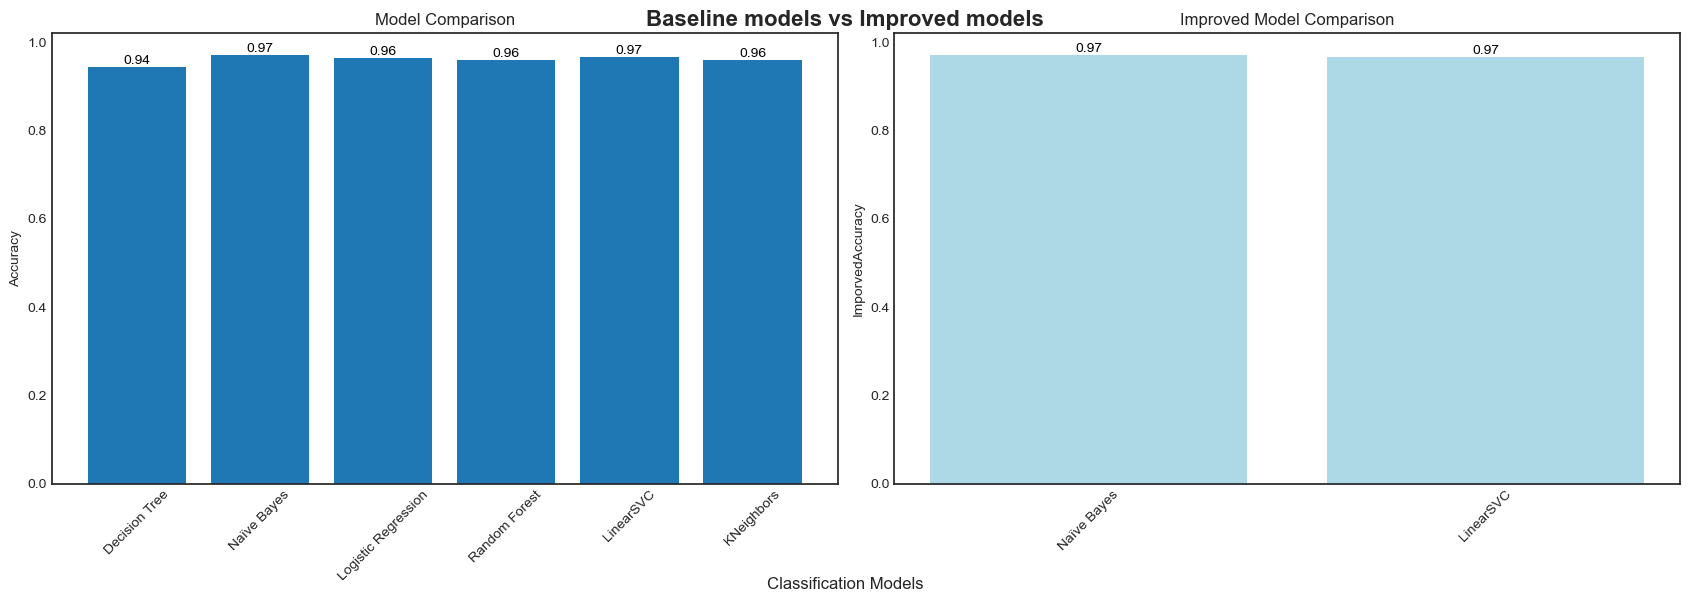

In [22]:
#Set random seed
np.random.seed(42)

#Make a dictionary to keep improved model scores
improved_model_scores = {"Naïve Bayes":gs_nb_score,
                        "LinearSVC": gs_svc_score}

# create a dataset for  improved model scores
improved_model_compare = pd.DataFrame(improved_model_scores,index=["accuracy"])

#plot the two bar graph baseline models and improved models
fig , (ax0 ,ax1) = plt.subplots(nrows=1,
                                ncols=2,
                                figsize = (17,6))


# for baseline models 
bars1 = ax0.bar(model_compare.columns, model_compare.loc["accuracy"])
# Add labels on top of  the baseline for each bar
for bar in bars1:
    height = bar.get_height()
    ax0.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.2f}",
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )
# Add axis labels and title for the baseline model
ax0.set_ylabel("Accuracy")
ax0.set_title("Model Comparison")
plt.xticks(rotation=45)
ax0.set_xticklabels(model_compare.columns, rotation=45)


# for improved models
bars2 = ax1.bar(improved_model_compare.columns,improved_model_compare.loc["accuracy"],color="lightblue")
for bar in bars2:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.2f}",
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )       
# Add axis labels and title for improved models
ax1.set_ylabel("ImporvedAccuracy")
ax1.set_title("Improved Model Comparison")
plt.xticks(rotation=45)
plt.tight_layout()

# Title the figure
fig.suptitle("Baseline models vs Improved models" ,fontsize = 16,fontweight="bold");
fig.supxlabel("Classification Models")
plt.show()

In [23]:
fig.savefig("baseline-improved-models.png")

# 7) Evaluating our tuned machine learning classifier
 * We have decided that we will go with `Naive Bayes` as our model
 * Now is the time to compare the values that the machine predicted with the true values
 * We will use the following model evaluation:
    1. ROC Curve and AUC score
    2. Confusion matrix
    3. Classification report
    4. accuracy with cross-validation
    5. Precision with cross-validation
    6. Recall with cross-validation
    7. F1-score with cross-validation

In [25]:
"""
To evaluate our model, we will need:
1. model predictions
2. true values
3. predicted probabilities"""

# make predictions using tuned naive bayes model
y_preds  = gs_nb.predict(X_test)

#true values
y_true = y_test

#predicted probabilities
y_proba = gs_nb.predict_proba(X_test)

### ROC Curve
* The ROC curve is mainly for binary classification. And we have a multiclass problem, plotting a single
ROC curve won't make sense.
* Since it's a multi-class, we will use the `One vs Rest(OvR)` approach

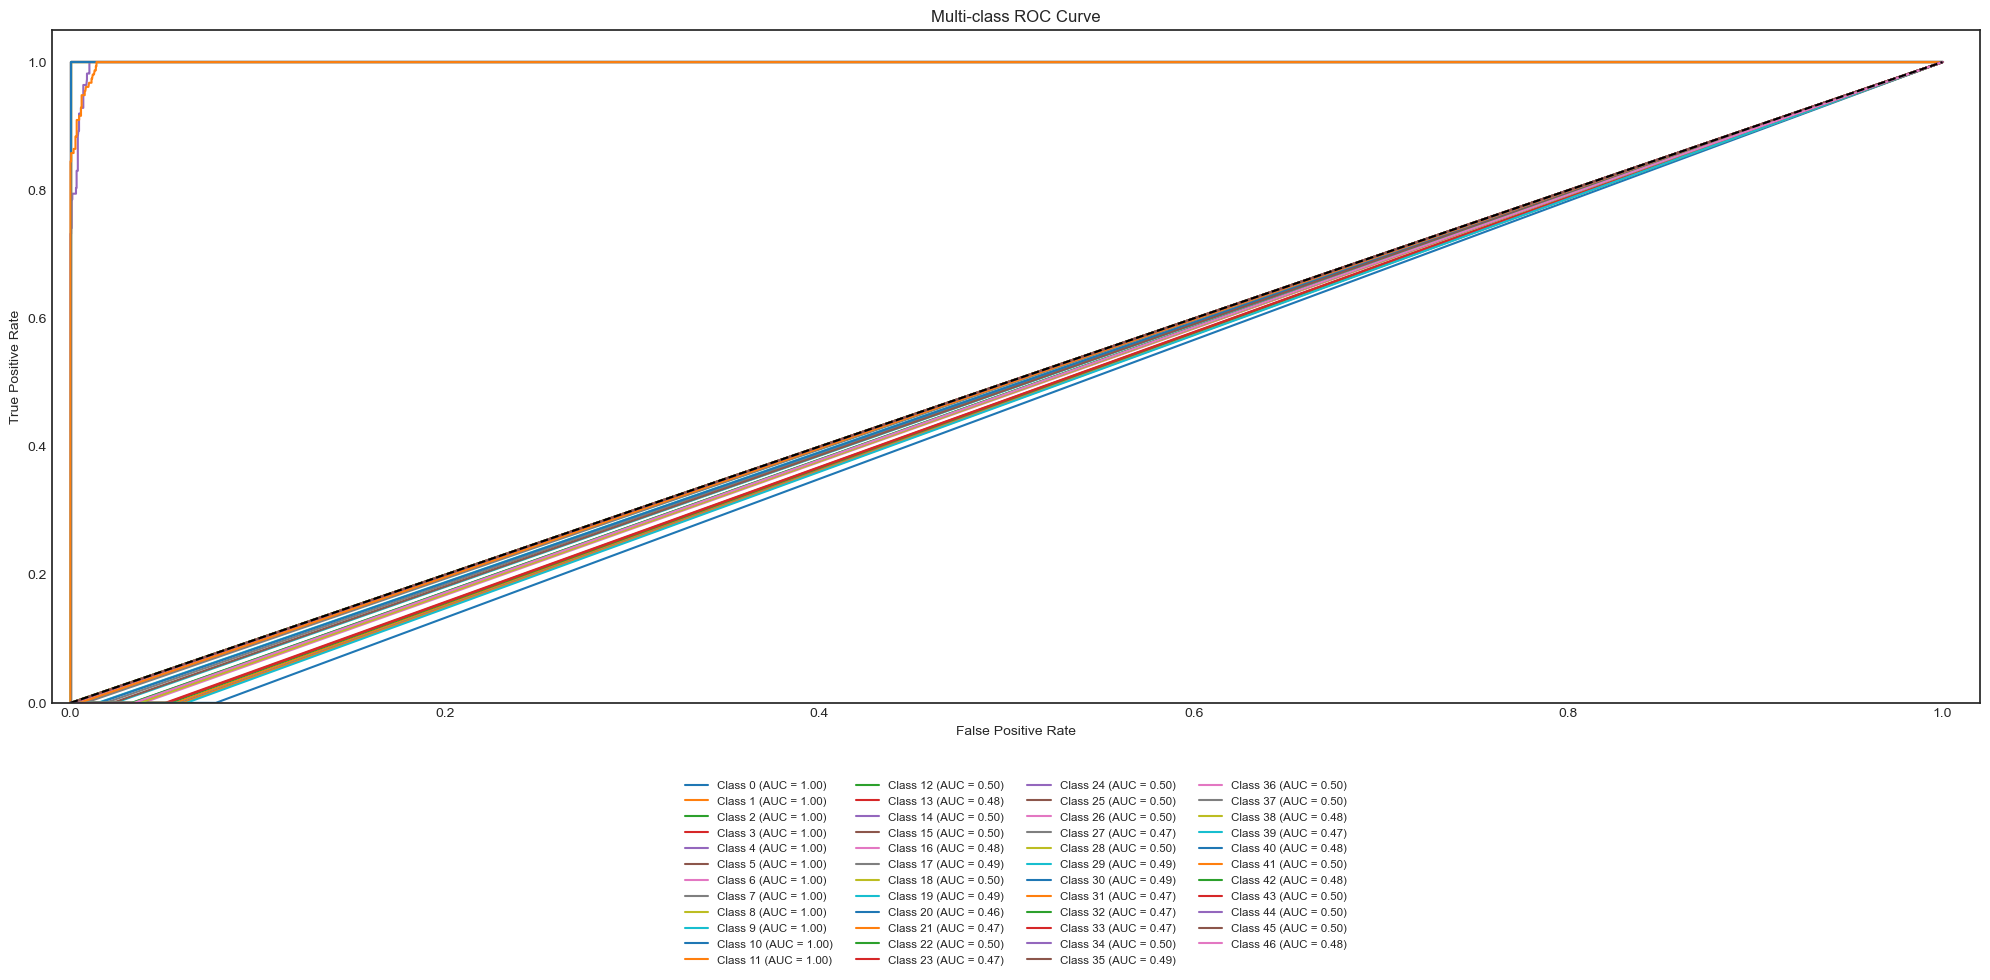

In [58]:
# Binarize the labels for multi-class ROC
y_test_bin = label_binarize(y_true, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Calculate ROC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Plot ROC curves
fig = plt.figure(figsize=(20, 10))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.02])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
           ncol=4, fontsize='small')
plt.tight_layout()
plt.show();

### Macro-average AUC


In [28]:
# Calculate macro-average AUC
macro_auc = np.mean(list(roc_auc.values()))
print(f"Macro-average AUC: {macro_auc:.3f}")

Macro-average AUC: 0.619


### Confusion matrix
* It will show us how our model classifies each disease


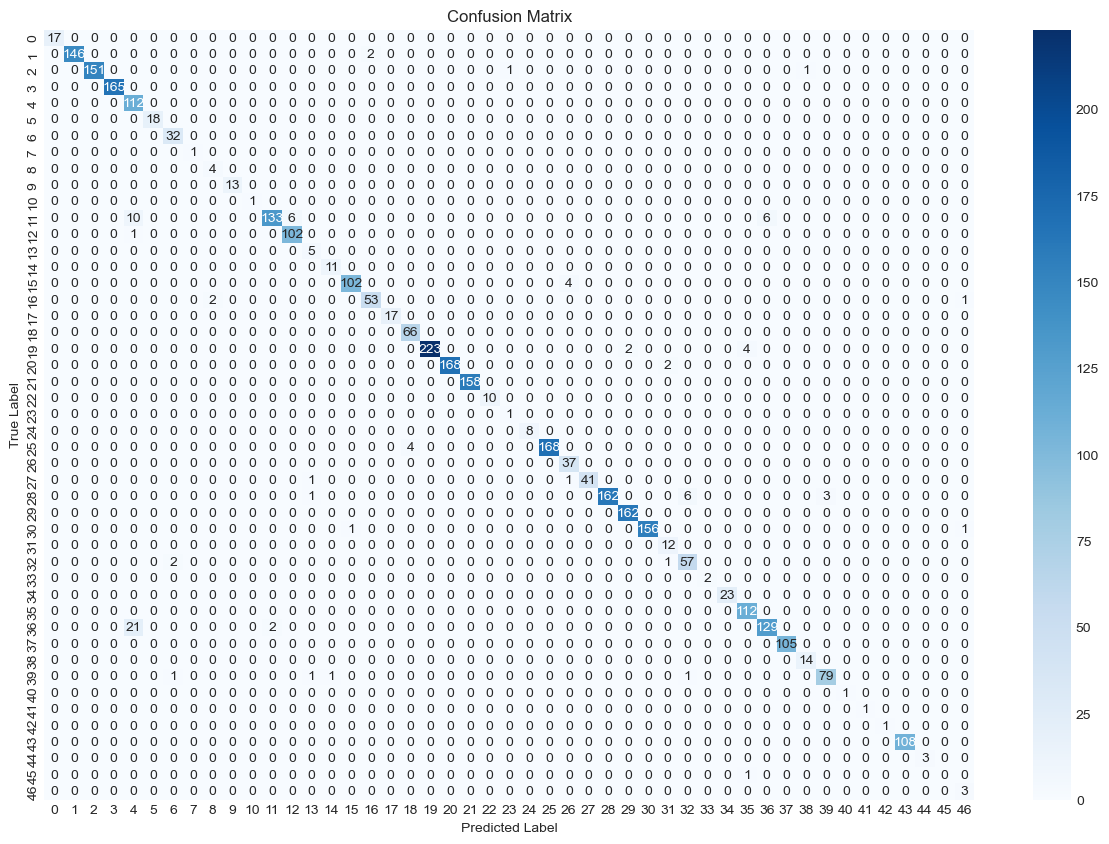

In [64]:
# Create a readable confusion matrix
cm = confusion_matrix(y_true, y_preds)

fig = plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show();

### Classification report
* return some of the main classification metrics such as precision, recall, and f1-score

In [67]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.99      0.99       148
           2       1.00      0.99      0.99       153
           3       1.00      1.00      1.00       165
           4       0.78      1.00      0.88       112
           5       1.00      1.00      1.00        18
           6       0.91      1.00      0.96        32
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         4
           9       1.00      1.00      1.00        13
          10       1.00      1.00      1.00         1
          11       0.99      0.86      0.92       155
          13       0.94      0.99      0.97       103
          14       0.62      1.00      0.77         5
          15       0.92      1.00      0.96        11
          16       0.99      0.96      0.98       106
          17       0.96      0.95      0.95        56
          18       1.00    

* Calculate evaluation metrics using `cross-validation`
* Now we are going to calculate the `accuracy`, `precision`, `recall`, and `F1-score` of our model using `cross-validation`, and to do so will use `cross_val_score()`

In [68]:
#check best hyperparameters
gs_nb.best_params_

{'var_smoothing': 1e-09}

In [69]:
#create a new classifier with best parameters
clf = GaussianNB(var_smoothing = 1e-09)

### Cross-validated accuracy

In [70]:
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc = np.mean(cv_acc)
print(cv_acc)

0.9702833599350823


### Cross-validated precision

In [72]:
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision_macro")
cv_precision = np.mean(cv_precision)
print(cv_precision)

0.925826596588349


### Cross-validated recall

In [73]:
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall_macro")
cv_recall = np.mean(cv_recall)
print(cv_recall)

0.9705000385945699


### Cross-validated f1-score

In [74]:
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1_macro")
cv_f1 = np.mean(cv_f1)
print(cv_f1)

0.9424869080285159


In [75]:
cv_metrics = pd.DataFrame({"accuracy":cv_acc,
                           "precision": cv_precision,
                           "Recall" : cv_recall,
                           "F1":cv_f1},
                           index = [0])

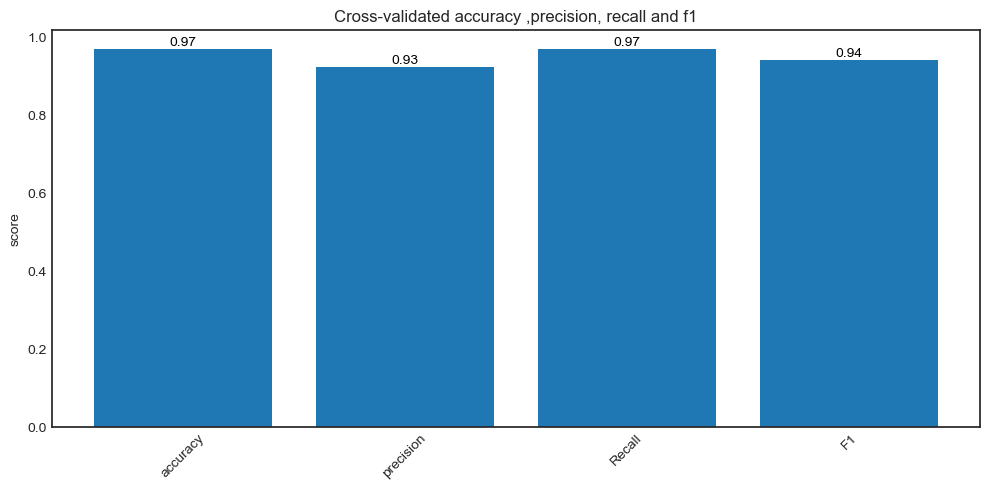

In [76]:
# Plot the bar graph
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(cv_metrics.columns, cv_metrics.loc[0])

# Add labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.2f}",
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Add axis labels and title
ax.set_ylabel("score")
ax.set_title("Cross-validated accuracy ,precision, recall and f1")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

# 8) Export the model
 * It's time to export our model
 *We know two ways of exporting the model
    1. Using `pickle`
    2. Using `joblib`
 * We will go with joblib, it is  more secure and good for big datasets

In [78]:
from joblib import dump , load
# save model to file
dump(gs_nb,filename = "gs_nb_model.joblib")

['gs_nb_model.joblib']

# 9) Import, load, and test the model again

In [79]:
# import a saved joblib model
loaded_joblib_model = load(filename="gs_nb_model.joblib")

In [81]:
# accuracy score
joblib_y_accurancy = loaded_joblib_model.score(X_test,y_test)
joblib_y_accurancy

0.9714195979899497

In [82]:
# make predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
joblib_y_preds

array([32,  3, 32, ..., 40, 31, 13], shape=(3184,))

In [83]:
#Decoding Back
decoded_preds = le.inverse_transform(joblib_y_preds)
decoded_preds

array(['osteoarthritis', 'asthma', 'osteoarthritis', ..., 'skin cancer',
       'multiple sclerosis', 'drug abuse'], shape=(3184,), dtype=object)